# Постановка задачи

вам предстоит выяснить, от каких самых малоприбыльных рейсов из Анапы мы можем отказаться в зимнее время. Вы не знаете, по каким критериям ваше руководство будет отбирать рейсы, поэтому решаете собрать как можно больше информации, содержащейся в вашей базе, в один датасет. 

Исходя из того, что прибыльность рейса — это разница между доходом от продаж билетов и расходом на полет, соберите такой датасет, который позволит оценить эти цифры. 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import math


In [18]:
data = pd.read_csv('data-1618288281938.csv')
data

,flight_id,depart_city,depart_lon,depart_lat,arrival_city,arrival_lon,arrival_lat,scheduled_departure,flight_duration,ac_model,...,ac_economy,ac_comfort,ac_business,ticket_economy,ticket_comfort,ticket_business,price_economy,price_comfort,price_business,flight_price
0,136661,Anapa,37.347301,45.002102,Belgorod,36.590099,50.643799,2017-01-01 09:25:00+00,00:50:00,Sukhoi Superjet-100,...,85,0,12,84.0,0.0,12.0,6300.0,NaN,18900.0,759000.0
1,136420,Anapa,37.347301,45.002102,Moscow,37.414600,55.972599,2017-01-01 10:05:00+00,01:40:00,Boeing 737-300,...,118,0,12,93.0,0.0,11.0,12200.0,NaN,36600.0,1542000.0
2,136936,Anapa,37.347301,45.002102,Belgorod,36.590099,50.643799,2017-01-02 09:25:00+00,00:50:00,Sukhoi Superjet-100,...,85,0,12,73.0,0.0,9.0,6300.0,NaN,18900.0,632400.0
3,136458,Anapa,37.347301,45.002102,Moscow,37.414600,55.972599,2017-01-02 10:05:00+00,01:40:00,Boeing 737-300,...,118,0,12,101.0,0.0,9.0,12200.0,NaN,36600.0,1568800.0
4,136546,Anapa,37.347301,45.002102,Novokuznetsk,86.877197,53.811401,2017-01-03 06:10:00+00,05:05:00,Boeing 737-300,...,118,0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136953,Anapa,37.347301,45.002102,Belgorod,36.590099,50.643799,2017-02-27 09:25:00+00,00:50:00,Sukhoi Superjet-100,...,85,0,12,85.0,0.0,12.0,6300.0,NaN,18900.0,765300.0
123,136266,Anapa,37.347301,45.002102,Moscow,37.414600,55.972599,2017-02-27 10:05:00+00,01:40:00,Boeing 737-300,...,118,0,12,98.0,0.0,10.0,12200.0,NaN,36600.0,1566400.0
124,136513,Anapa,37.347301,45.002102,Novokuznetsk,86.877197,53.811401,2017-02-28 06:10:00+00,05:05:00,Boeing 737-300,...,118,0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,136844,Anapa,37.347301,45.002102,Belgorod,36.590099,50.643799,2017-02-28 09:25:00+00,00:50:00,Sukhoi Superjet-100,...,85,0,12,73.0,0.0,6.0,6300.0,NaN,18900.0,575100.0


*Описание признаков:*
- **flight_id** - id рейса
- **depart_city** - город отправления
- **depart_lon** - долгота города отправления
- **depart_lat** - широта города отправления
- **arrival_city** - город назначения
- **arrival_lon** - долгота города назначения
- **arrival_lat** - широта города назначения
- **scheduled_departure** - дата и время вылета по расписанию
- **flight_duration** - длительность полета
- **ac_model** - модель самолета
- **ac_range** - максимальная дальность полета
- **ac_economy** - количество мест эконом-класса
- **ac_comfort** - количество мест комфорт-класса
- **ac_business** - количество мест бизнес-класса
- **ticket_economy** - количество выкупленных мест эконом-класса на рейс
- **ticket_comfort**- количество выкупленных мест комфорт класса на рейс
- **ticket_business**- количество выкупленных мест бизнес-класса на рейс
- **price_economy** - базовая цена билета на эконом-класс
- **price_comfort** - базовая цена билета на комфорт-класс
- **price_business** - базовая цена билета на бизнес-класс
- **flight_price** - суммарную стоимость всех билетов на рейсе

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            127 non-null    int64  
 1   depart_city          127 non-null    object 
 2   depart_lon           127 non-null    float64
 3   depart_lat           127 non-null    float64
 4   arrival_city         127 non-null    object 
 5   arrival_lon          127 non-null    float64
 6   arrival_lat          127 non-null    float64
 7   scheduled_departure  127 non-null    object 
 8   flight_duration      127 non-null    object 
 9   ac_model             127 non-null    object 
 10  ac_range             127 non-null    int64  
 11  ac_economy           127 non-null    int64  
 12  ac_comfort           127 non-null    int64  
 13  ac_business          127 non-null    int64  
 14  ticket_economy       118 non-null    float64
 15  ticket_comfort       118 non-null    flo

*Известно, что датасет не содержит информацию по билетам в Новокузнецк, поэтому мы не можем оценить эти рейсы - удалим их из датасета.*

In [20]:
data = data[data.arrival_city != 'Novokuznetsk']

*Также обратим внимание, что в присутствующих моделях самолетов нет ни одного места комфорт-класса - удалим столбцы по этим местам.*

In [21]:
data = data.drop(['ac_comfort','ticket_comfort','price_comfort'], axis=1)

In [22]:
data

,flight_id,depart_city,depart_lon,depart_lat,arrival_city,arrival_lon,arrival_lat,scheduled_departure,flight_duration,ac_model,ac_range,ac_economy,ac_business,ticket_economy,ticket_business,price_economy,price_business,flight_price
0,136661,Anapa,37.347301,45.002102,Belgorod,36.590099,50.643799,2017-01-01 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,84.0,12.0,6300.0,18900.0,759000.0
1,136420,Anapa,37.347301,45.002102,Moscow,37.414600,55.972599,2017-01-01 10:05:00+00,01:40:00,Boeing 737-300,4200,118,12,93.0,11.0,12200.0,36600.0,1542000.0
2,136936,Anapa,37.347301,45.002102,Belgorod,36.590099,50.643799,2017-01-02 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,73.0,9.0,6300.0,18900.0,632400.0
3,136458,Anapa,37.347301,45.002102,Moscow,37.414600,55.972599,2017-01-02 10:05:00+00,01:40:00,Boeing 737-300,4200,118,12,101.0,9.0,12200.0,36600.0,1568800.0
5,136937,Anapa,37.347301,45.002102,Belgorod,36.590099,50.643799,2017-01-03 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,72.0,9.0,6300.0,18900.0,626100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,136351,Anapa,37.347301,45.002102,Moscow,37.414600,55.972599,2017-02-26 10:05:00+00,01:40:00,Boeing 737-300,4200,118,12,94.0,11.0,12200.0,36600.0,1555400.0
122,136953,Anapa,37.347301,45.002102,Belgorod,36.590099,50.643799,2017-02-27 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,85.0,12.0,6300.0,18900.0,765300.0
123,136266,Anapa,37.347301,45.002102,Moscow,37.414600,55.972599,2017-02-27 10:05:00+00,01:40:00,Boeing 737-300,4200,118,12,98.0,10.0,12200.0,36600.0,1566400.0
125,136844,Anapa,37.347301,45.002102,Belgorod,36.590099,50.643799,2017-02-28 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,73.0,6.0,6300.0,18900.0,575100.0


*Преобразуем долготу и широту городов отправления и прибытия в расстояние между городами*

In [23]:
# Используем метод Хаверсина

def getDistanceFromLatLonInKm(lat1,lon1,lat2,lon2):
    R = 6371 # Radius of the earth in km
    dLat = math.radians(lat2-lat1)  # deg2rad below
    dLon = math.radians(lon2-lon1)
    a = math.sin(dLat/2) * math.sin(dLat/2) \
        + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) \
        * math.sin(dLon/2) * math.sin(dLon/2)
     
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c; # Distance in km
    return d


In [24]:
data.insert(7,'distance', data.apply(lambda row: getDistanceFromLatLonInKm(row['depart_lat'], row['depart_lon'], row['arrival_lat'], row['arrival_lon']), axis=1))

In [25]:
data = data.drop(['depart_lon', 'depart_lat', 'arrival_lat', 'arrival_lon'], axis=1)

In [26]:
data

,flight_id,depart_city,arrival_city,distance,scheduled_departure,flight_duration,ac_model,ac_range,ac_economy,ac_business,ticket_economy,ticket_business,price_economy,price_business,flight_price
0,136661,Anapa,Belgorod,629.860554,2017-01-01 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,84.0,12.0,6300.0,18900.0,759000.0
1,136420,Anapa,Moscow,1219.872758,2017-01-01 10:05:00+00,01:40:00,Boeing 737-300,4200,118,12,93.0,11.0,12200.0,36600.0,1542000.0
2,136936,Anapa,Belgorod,629.860554,2017-01-02 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,73.0,9.0,6300.0,18900.0,632400.0
3,136458,Anapa,Moscow,1219.872758,2017-01-02 10:05:00+00,01:40:00,Boeing 737-300,4200,118,12,101.0,9.0,12200.0,36600.0,1568800.0
5,136937,Anapa,Belgorod,629.860554,2017-01-03 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,72.0,9.0,6300.0,18900.0,626100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,136351,Anapa,Moscow,1219.872758,2017-02-26 10:05:00+00,01:40:00,Boeing 737-300,4200,118,12,94.0,11.0,12200.0,36600.0,1555400.0
122,136953,Anapa,Belgorod,629.860554,2017-02-27 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,85.0,12.0,6300.0,18900.0,765300.0
123,136266,Anapa,Moscow,1219.872758,2017-02-27 10:05:00+00,01:40:00,Boeing 737-300,4200,118,12,98.0,10.0,12200.0,36600.0,1566400.0
125,136844,Anapa,Belgorod,629.860554,2017-02-28 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,73.0,6.0,6300.0,18900.0,575100.0


*Рассчитаем базовый доход от перелета, при условии, что салон заполнен полностью*

In [27]:
def max_flight_price(row):
    return (row['ac_economy']*row['price_economy'] + row['ac_business']*row['price_business'])

data['max_flight_price'] = data.apply(max_flight_price, axis=1)

In [28]:
data.insert(12, 'per_fullness', data.apply(lambda row: (row.ticket_economy + row.ticket_business)/(row.ac_economy + row.ac_business), axis=1))
data

,flight_id,depart_city,arrival_city,distance,scheduled_departure,flight_duration,ac_model,ac_range,ac_economy,ac_business,ticket_economy,ticket_business,per_fullness,price_economy,price_business,flight_price,max_flight_price
0,136661,Anapa,Belgorod,629.860554,2017-01-01 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,84.0,12.0,0.989691,6300.0,18900.0,759000.0,762300.0
1,136420,Anapa,Moscow,1219.872758,2017-01-01 10:05:00+00,01:40:00,Boeing 737-300,4200,118,12,93.0,11.0,0.800000,12200.0,36600.0,1542000.0,1878800.0
2,136936,Anapa,Belgorod,629.860554,2017-01-02 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,73.0,9.0,0.845361,6300.0,18900.0,632400.0,762300.0
3,136458,Anapa,Moscow,1219.872758,2017-01-02 10:05:00+00,01:40:00,Boeing 737-300,4200,118,12,101.0,9.0,0.846154,12200.0,36600.0,1568800.0,1878800.0
5,136937,Anapa,Belgorod,629.860554,2017-01-03 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,72.0,9.0,0.835052,6300.0,18900.0,626100.0,762300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,136351,Anapa,Moscow,1219.872758,2017-02-26 10:05:00+00,01:40:00,Boeing 737-300,4200,118,12,94.0,11.0,0.807692,12200.0,36600.0,1555400.0,1878800.0
122,136953,Anapa,Belgorod,629.860554,2017-02-27 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,85.0,12.0,1.000000,6300.0,18900.0,765300.0,762300.0
123,136266,Anapa,Moscow,1219.872758,2017-02-27 10:05:00+00,01:40:00,Boeing 737-300,4200,118,12,98.0,10.0,0.830769,12200.0,36600.0,1566400.0,1878800.0
125,136844,Anapa,Belgorod,629.860554,2017-02-28 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,73.0,6.0,0.814433,6300.0,18900.0,575100.0,762300.0


*Рассчитаем прибыль с каждого рейса*

За доход от рейса берем сумму всех проданных билетов *flight_price*

При расчете затрат на перелет учитывается много данных: стоимость аренды и обслуживания самолета, места в аэропорте, зарплаты сотрудников и т.д. Мы максимально упростим схему и учтем только затраты на авиатопливо. Для этого найдем расход топлива для моделей самолетов, которые участвуют в перелетах и среднюю цену авиатоплива за 2017 год:
расход топлива в час,
- для модели Boeing 737-300 -  2.6 т в час
- для модели Sukhoi Superjet-100 -  1.7 т в час
- цена этого топлива - 42000 р. за тонну

На остальные расходы выделим 60% от максимального дохода рейса (при максимальной заполненности)


In [58]:
# посчитаем расходы на перелеты
def flight_spends(row):
    spends = 0.6 * row['max_flight_price'] # 60% от дохода на затраты содержания и обслуживания
    fuel_price = 45000 #rub/t
    boeng = 2.6 #t/h
    su = 1.7 #t/h
    flight_duration = row['flight_duration']
    # переведем строку в datetime и затем сразу в часы с учетом минут
    hours = datetime.strptime(flight_duration, '%H:%M:%S').hour + datetime.strptime(flight_duration, '%H:%M:%S').minute/60
    if (row['ac_model'] == 'Boeing 737-300'):
        spends += boeng * fuel_price * hours # добавляем расходы на топливо
    elif(row['ac_model'] == 'Sukhoi Superjet-100'):
        spends += su * fuel_price * hours # добавляем расходы на топливо
    return spends

In [59]:
data['flight_spends'] = data.apply(flight_spends, axis=1)
data['profit'] = data.apply(lambda row: row['flight_price'] - row['flight_spends'], axis=1)
data

,flight_id,depart_city,arrival_city,distance,scheduled_departure,flight_duration,ac_model,ac_range,ac_economy,ac_business,ticket_economy,ticket_business,per_fullness,price_economy,price_business,flight_price,max_flight_price,flight_spends,profit
0,136661,Anapa,Belgorod,629.860554,2017-01-01 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,84.0,12.0,0.989691,6300.0,18900.0,759000.0,762300.0,521130.0,237870.0
1,136420,Anapa,Moscow,1219.872758,2017-01-01 10:05:00+00,01:40:00,Boeing 737-300,4200,118,12,93.0,11.0,0.800000,12200.0,36600.0,1542000.0,1878800.0,1322280.0,219720.0
2,136936,Anapa,Belgorod,629.860554,2017-01-02 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,73.0,9.0,0.845361,6300.0,18900.0,632400.0,762300.0,521130.0,111270.0
3,136458,Anapa,Moscow,1219.872758,2017-01-02 10:05:00+00,01:40:00,Boeing 737-300,4200,118,12,101.0,9.0,0.846154,12200.0,36600.0,1568800.0,1878800.0,1322280.0,246520.0
5,136937,Anapa,Belgorod,629.860554,2017-01-03 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,72.0,9.0,0.835052,6300.0,18900.0,626100.0,762300.0,521130.0,104970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,136351,Anapa,Moscow,1219.872758,2017-02-26 10:05:00+00,01:40:00,Boeing 737-300,4200,118,12,94.0,11.0,0.807692,12200.0,36600.0,1555400.0,1878800.0,1322280.0,233120.0
122,136953,Anapa,Belgorod,629.860554,2017-02-27 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,85.0,12.0,1.000000,6300.0,18900.0,765300.0,762300.0,521130.0,244170.0
123,136266,Anapa,Moscow,1219.872758,2017-02-27 10:05:00+00,01:40:00,Boeing 737-300,4200,118,12,98.0,10.0,0.830769,12200.0,36600.0,1566400.0,1878800.0,1322280.0,244120.0
125,136844,Anapa,Belgorod,629.860554,2017-02-28 09:25:00+00,00:50:00,Sukhoi Superjet-100,3000,85,12,73.0,6.0,0.814433,6300.0,18900.0,575100.0,762300.0,521130.0,53970.0


*Преобразуем датасет:*
Удалим поля:
- distance и ac_range удалим, так как видим, что максимальная дальность полетов обоих самолетов выше всех расстояний между рассматриваемыми городами. Однако стоит держать  в уме, что SuperJet может летать и до Москвы, его минус только в маленькой вместительности
- Нам уже не понадобятся: длительность перелетов и цены билетов по классам
- 'ac_economy', 'ac_business', 'ticket_economy', 'ticket_business' - по этим данным можно преобразуем количество выкупленных билетов по классам в процент занятых мест, однако это тонкий параметр, который пока отложим его анализ

Новые данные:
- Доля занятых мест в эконом классе и бизнес классе (возможно выгоднее делать больше дешовых мест) - *per_fullness_*
- Доля прибыли от затрат -*per_profit_of_spends*

In [60]:
# data.columns
data2 = data[['flight_id', 'depart_city', 'arrival_city',
       'ac_model','scheduled_departure',
       'per_fullness', 'flight_spends','profit']].copy()

data2['per_profit_of_spends'] = data2.apply(lambda row: row['profit']/row['flight_spends'], axis=1)
data2.sort_values('per_profit_of_spends')

,flight_id,depart_city,arrival_city,ac_model,scheduled_departure,per_fullness,flight_spends,profit,per_profit_of_spends
62,136642,Anapa,Belgorod,Sukhoi Superjet-100,2017-01-30 09:25:00+00,0.659794,521130.0,9870.0,0.018940
114,136807,Anapa,Belgorod,Sukhoi Superjet-100,2017-02-23 09:25:00+00,0.701031,521130.0,9870.0,0.018940
18,136464,Anapa,Moscow,Boeing 737-300,2017-01-09 10:05:00+00,0.769231,1322280.0,75720.0,0.057265
83,136250,Anapa,Moscow,Boeing 737-300,2017-02-08 10:05:00+00,0.761538,1322280.0,85520.0,0.064676
16,136122,Anapa,Moscow,Boeing 737-300,2017-01-08 10:05:00+00,0.746154,1322280.0,108720.0,0.082222
...,...,...,...,...,...,...,...,...,...
24,136758,Anapa,Belgorod,Sukhoi Superjet-100,2017-01-12 09:25:00+00,1.000000,521130.0,244170.0,0.468540
97,136605,Anapa,Belgorod,Sukhoi Superjet-100,2017-02-15 09:25:00+00,1.000000,521130.0,244170.0,0.468540
99,136875,Anapa,Belgorod,Sukhoi Superjet-100,2017-02-16 09:25:00+00,1.000000,521130.0,244170.0,0.468540
103,136827,Anapa,Belgorod,Sukhoi Superjet-100,2017-02-18 09:25:00+00,1.000000,521130.0,244170.0,0.468540


*Считается, что если прибыль от дела менее 20% от затрат, то это не выгодное мероприятие*

In [61]:
print('Не выгодные рейсы, от которых можно отказаться:')
dd = data2[data2.per_profit_of_spends<0.2].sort_values('per_profit_of_spends')
display(dd)
print('Всего:', len(dd))

Не выгодные рейсы, от которых можно отказаться:


,flight_id,depart_city,arrival_city,ac_model,scheduled_departure,per_fullness,flight_spends,profit,per_profit_of_spends
114,136807,Anapa,Belgorod,Sukhoi Superjet-100,2017-02-23 09:25:00+00,0.701031,521130.0,9870.0,0.018940
62,136642,Anapa,Belgorod,Sukhoi Superjet-100,2017-01-30 09:25:00+00,0.659794,521130.0,9870.0,0.018940
18,136464,Anapa,Moscow,Boeing 737-300,2017-01-09 10:05:00+00,0.769231,1322280.0,75720.0,0.057265
83,136250,Anapa,Moscow,Boeing 737-300,2017-02-08 10:05:00+00,0.761538,1322280.0,85520.0,0.064676
16,136122,Anapa,Moscow,Boeing 737-300,2017-01-08 10:05:00+00,0.746154,1322280.0,108720.0,0.082222
61,136178,Anapa,Moscow,Boeing 737-300,2017-01-29 10:05:00+00,0.761538,1322280.0,112320.0,0.084944
76,136360,Anapa,Moscow,Boeing 737-300,2017-02-05 10:05:00+00,0.746154,1322280.0,133120.0,0.100675
115,136204,Anapa,Moscow,Boeing 737-300,2017-02-23 10:05:00+00,0.823077,1322280.0,135520.0,0.102490
125,136844,Anapa,Belgorod,Sukhoi Superjet-100,2017-02-28 09:25:00+00,0.814433,521130.0,53970.0,0.103563
53,136383,Anapa,Moscow,Boeing 737-300,2017-01-25 10:05:00+00,0.815385,1322280.0,170920.0,0.129262


Всего: 29


Отобразим невыгодные перелеты на графике. Точки ниже красной линии - это невыгодные перелеты

In [127]:
data2['scheduled_departure'] = pd.to_datetime(data2['scheduled_departure'])

True


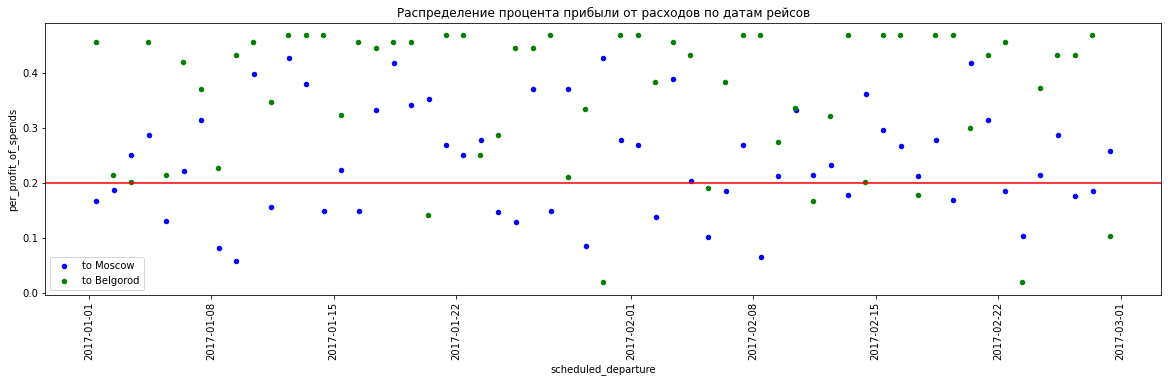

In [131]:
ax1 = data2[['scheduled_departure', 'per_profit_of_spends']][data2['arrival_city']=='Moscow'].plot(x = 'scheduled_departure', 
        y = 'per_profit_of_spends', 
        kind = 'scatter', 
        title = 'Распределение процента прибыли от расходов по датам рейсов',
        figsize = (20,5),
        color = 'blue',
        label = 'to Moscow - Boeng')
ax2 = data2[['scheduled_departure', 'per_profit_of_spends']][data2['arrival_city']=='Belgorod'].plot(x = 'scheduled_departure', 
        y = 'per_profit_of_spends', 
        kind = 'scatter', 
        title = 'Распределение процента прибыли от расходов по датам рейсов',
        figsize = (20,5),
        color = 'green',
        label = 'to Belgorod - Superjet',
        ax=ax1)

plt.xticks(rotation=90)
plt.axhline(y=0.2, color='red')
plt.legend

print(ax1 == ax2) 



По графику нельзя сказать, что невыгодные перелеты зависят от даты. Хотя на болльшом количестве данных есть вероятность, что такая зависимость может появиться.

Но по графику видно, что доля прибыли на самолетах Superjet выше, чем на самолетах Boeng. В первую очередь это связано с заполняемостью. В Superjet чаще выкупают большую долю билетов.
